In [1]:
import pandas as pd
import numpy as np
import os
import collections
import dscrutils2py as dscrutils
import dscutils

import matplotlib.pyplot as plt
import mpl_stylesheet
import mpl_utils
import plot_meta
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 18, colors = 'banskt', dpi = 72)

In [2]:
dsc_outdir = os.path.realpath("../dsc/dsc_result")
methods = ["ridge", "lasso", "elastic_net", "mr_ash", "mr_ash_init"]
dims = (500, 200)
sfracs = [0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1.0]
targets = ["simulate", "simulate.dims", "simulate.se", "simulate.sfrac",  "fit", "mse.err"]
sim_scenario = "indepgauss"

In [3]:
conditions = [f"$(simulate.dims) == '({dims[0]},{dims[1]})'", 
              f"$(simulate) == '{sim_scenario}'"]

dscout = dscrutils.dscquery(dsc_outdir, targets, conditions = conditions)
dscout['score1'] = np.sqrt(dscout['mse.err'])/dscout['simulate.se']

INFO: Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO: NumExpr defaulting to 8 threads.


Calling: dsc-query /home/saikat/Documents/work/ebmr/simulation/mr-ash-dsc/dsc/dsc_result -o /tmp/Rtmp5LiGir/file196c87d53d36d.csv --target "simulate simulate.dims simulate.se simulate.sfrac fit mse.err" --force 
Loaded dscquery output table with 700 rows and 9 columns.



In [4]:
dscout

,DSC,simulate,simulate.dims,simulate.se,simulate.sfrac,fit,mse.err,score1
0,1,indepgauss,"(500,200)",3.462448,0.010,ridge,17.987708,1.224911
1,1,indepgauss,"(500,200)",1.905777,0.025,ridge,5.887886,1.273232
2,1,indepgauss,"(500,200)",3.063747,0.050,ridge,13.652301,1.206008
3,1,indepgauss,"(500,200)",4.998240,0.100,ridge,34.693989,1.178447
4,1,indepgauss,"(500,200)",7.226967,0.250,ridge,68.690571,1.146813
...,...,...,...,...,...,...,...,...
695,20,indepgauss,"(500,200)",2.044878,0.050,mr_ash_init,4.105359,0.990851
696,20,indepgauss,"(500,200)",3.780925,0.100,mr_ash_init,15.440080,1.039266
697,20,indepgauss,"(500,200)",7.981389,0.250,mr_ash_init,76.396134,1.095109
698,20,indepgauss,"(500,200)",9.921220,0.500,mr_ash_init,129.124455,1.145353


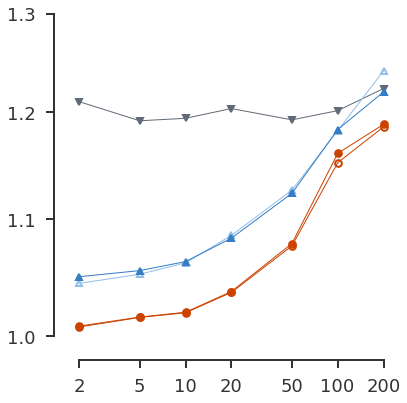

In [6]:
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)

xvals  = [max(1, int(x * dims[1])) for x in sfracs]
xscale = 'log10'
yscale = 'log10'

for method in methods:
    score = [0 for x in sfracs]
    method_condition = f"$(fit) == {method}"
    for i, sfrac in enumerate(sfracs):
        sfrac_condition = f"$(simulate.sfrac) == {sfrac}"
        dfselect = dscutils.select_dfrows(dscout, [method_condition, sfrac_condition])
        score[i] = np.mean(dfselect['score1'].to_numpy())
        #if method == "mr_ash_init":
        #    print(xvals[i], score[i])

    # Plot xvals vs score
    pm = plot_meta.regression_methods()[method]
    xx = mpl_utils.scale_array(xvals, xscale)
    yy = mpl_utils.scale_array(score, xscale)
    ax1.plot(xx, yy, label = pm.label,
             color = pm.color, lw = pm.linewidth / 2, ls = pm.linestyle,
             marker = pm.marker, ms = pm.size / 1.2, mec = pm.color, mfc = pm.facecolor,
             mew = pm.linewidth, zorder = pm.zorder
            )

mpl_utils.set_ymax(ax1, 1.3, scale = yscale)
mpl_utils.set_xticks(ax1, scale = xscale, tickmarks = xvals)
mpl_utils.set_yticks(ax1, scale = yscale, kmin = 2, kmax = 4)
mpl_utils.decorate_axes(ax1, hide = ["top", "right"], ticklimits = True)
#mpl_utils.decorate_axes(ax1, hide = ["all", "right"], ticklimits = True)

#ax1.legend()

plt.show()